In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("C:\\program1\\class\\PAMAP_features.csv", index_col=0)
df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,2,17,light,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,2,4,moderate,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,7,5,vigorous,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,7,17,light,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,8,3,light,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,6,2,light,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,3,2,light,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,6,4,moderate,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,2,7,moderate,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


Text(0.5, 1.0, 'PAMAP')

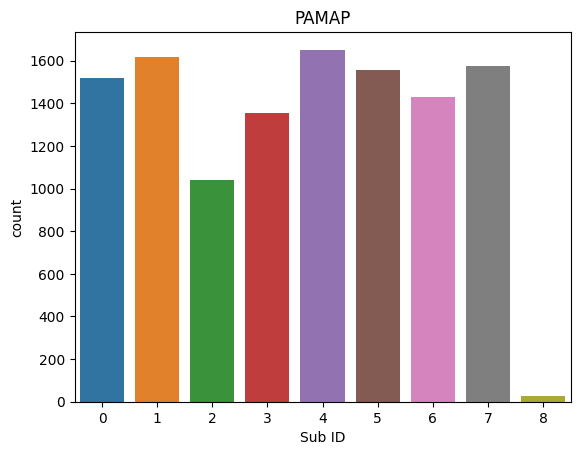

In [3]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="sub_id")
plt.xlabel("Sub ID")
plt.title("PAMAP")

In [4]:
df['sub_id'].value_counts()

4    1651
1    1618
7    1576
5    1556
0    1518
6    1430
3    1353
2    1042
8      29
Name: sub_id, dtype: int64

Text(0.5, 1.0, 'PAMAP')

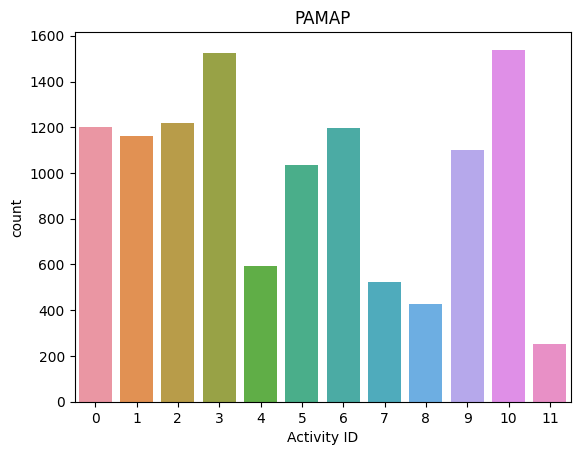

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="activity_id")
plt.xlabel("Activity ID")
plt.title("PAMAP")

Text(0.5, 1.0, 'act_level')

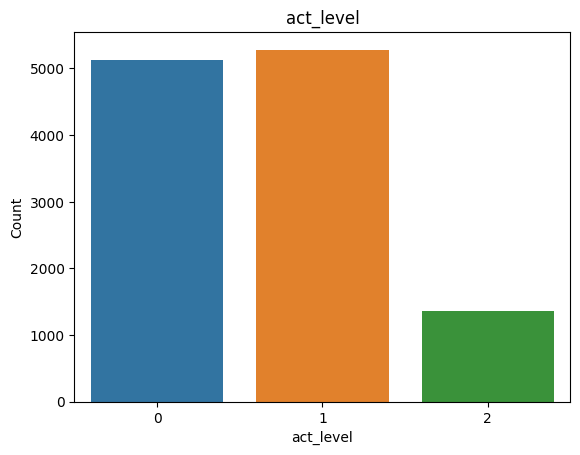

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="act_level")
plt.xlabel("act_level")
plt.ylabel("Count")
plt.title("act_level")

In [7]:
df['activity_id'].value_counts()

10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: activity_id, dtype: int64

In [8]:
# 컬렴명 확인
df.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

In [9]:
# 결측치 확인
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [10]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sub_id              0
activity_id         0
act_level           0
hr_mean             0
hr_mean_normal      0
                   ..
chest_gyr_yz_cor    0
chest_gyr_xz_cor    0
ankle_gyr_xy_cor    0
ankle_gyr_yz_cor    0
ankle_gyr_xz_cor    0
Length: 67, dtype: int64

In [11]:
X = df.drop(['sub_id', 'activity_id'], axis=1)
#X= df[['sub_id']]
X.head()

,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,0,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,2,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,0,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,0,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [12]:
y=df['act_level']
y.value_counts()

1    5283
0    5124
2    1366
Name: act_level, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
4003,1,124.000000,1.675676,0.000000,2.153833e-14,30.190674,0.013722,-9.546343,3.375490,4.933776,...,-0.032127,-0.308496,-0.318698,-0.280268,0.047917,-0.787143,-0.160538,-0.701586,-0.629107,0.362436
12008,1,115.000000,1.916667,0.000000,1.421085e-14,30.381958,0.019659,-5.025204,4.336074,7.973560,...,-0.439645,-0.039964,-0.328115,-0.418634,-0.081783,-0.058669,-0.206770,-0.459657,-0.306672,0.194089
1382,1,119.979492,1.599727,0.127311,1.697481e-03,33.194580,0.019809,-10.137418,3.467884,4.428044,...,0.041705,-0.128491,-0.601198,-0.492646,-0.188496,-0.632446,-0.151706,-0.553157,-0.778303,0.306613
6967,1,116.658203,2.011348,0.466765,8.047671e-03,33.656128,0.031250,-8.836882,1.708309,2.888983,...,-0.000476,-0.138586,-0.022401,0.065541,-0.021661,-0.395656,-0.643798,0.102230,-0.389063,0.000441
5832,1,119.000000,1.750000,0.000000,0.000000e+00,29.656128,0.031250,-12.250689,2.960968,2.896663,...,-0.255368,-0.272865,-0.897084,0.460136,-0.050740,0.319996,-0.085574,0.193541,0.899430,0.342511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0,92.000000,1.243243,0.000000,6.661338e-15,33.812500,0.000000,-4.357689,2.952657,7.693815,...,0.137440,-0.174543,0.237796,0.067775,-0.201561,-0.616165,0.007301,0.567074,-0.546483,-0.398801
14291,1,104.605469,1.743424,0.683011,1.138352e-02,33.000000,0.000000,-4.657513,1.604491,2.285957,...,-0.033366,-0.382679,0.008502,-0.425129,0.274348,-0.454366,-0.110536,0.345683,-0.514809,0.063547
4650,0,80.742188,1.187385,0.433352,6.372826e-03,31.625000,0.000000,-0.606078,0.534985,8.980145,...,0.522188,-0.176937,-0.446573,0.108573,0.067445,-0.624934,-0.092516,0.083229,-0.461855,-0.179261
2156,0,86.597656,1.170239,1.109448,1.499254e-02,33.492920,0.019809,-1.760465,7.712154,3.789683,...,0.240315,-0.214268,-0.464665,0.345377,0.205332,-0.414919,-0.600709,0.260374,-0.102413,0.068893


In [14]:
y_train

4003     1
12008    1
1382     1
6967     1
5832     1
        ..
2366     0
14291    1
4650     0
2156     0
13284    0
Name: act_level, Length: 9418, dtype: int32

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))


--- SVM Classifier ---
0.95032
[[1000    3    0]
 [  13 1048    5]
 [   0   96  190]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1003
           1       0.91      0.98      0.95      1066
           2       0.97      0.66      0.79       286

    accuracy                           0.95      2355
   macro avg       0.96      0.88      0.91      2355
weighted avg       0.95      0.95      0.95      2355



In [17]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree classifier and predict
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))


--- Decision Tree Classifier ---
1.00000
[[1003    0    0]
 [   0 1066    0]
 [   0    0  286]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00      1066
           2       1.00      1.00      1.00       286

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355



In [18]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))
print(classification_report(y_test, pred_nn))


--- Neural Network Classifier ---
1.00000
[[1003    0    0]
 [   0 1066    0]
 [   0    0  286]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00      1066
           2       1.00      1.00      1.00       286

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355

